### Keras / Tensorflow Classification - Example
Here we're going to attempt to utilize Keras/Tensorflow to predict the whether or not an individual has cancer.

The data being used can be seen on my github below:

https://github.com/kaledev/PythonSnippets/blob/master/Datasets/Keras/cancer_classification.csv

#### Data Imports and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/cancer_classification.csv')

Here we can see the dataset is fairly well balanced in terms of classification of the labels, if the dataset was unbalanced then we might see issues with overfitting.

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

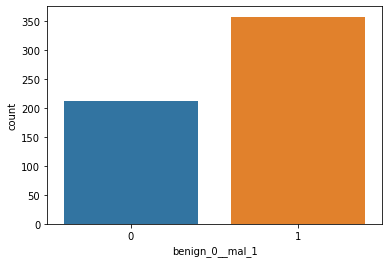

In [8]:
sns.countplot(x='benign_0__mal_1',data=df)

#### Create Models and Predict

In [3]:
#Set X/y
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

We need to scale the data so all features are in sync

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()

In [8]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #Do not fit on testing to avoid overfitting/data leakage

Now we can create the Neural Network

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

We're going to define an early stop here to avoid overfitting and improve accuracy - With Early Stopping, Keras will not run the entirely defined amount of epochs if doing so will cause overfitting.

In [17]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [18]:
X_train.shape

(426, 30)

As we see 30 features here, we set the layers to be: <br />
Input: 30 <br />
Hidden: 15 (half) <br />
Output: 1

In [19]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5)) #Choose somewhere between 0/1 (1 = 100%) of neurons to turn off

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5)) #Choose somewhere between 0/1 (1 = 100%) of neurons to turn off

#BINARY CLASSIFICATION MUST BE SIGMOID
model.add(Dense(1, activation='sigmoid'))

#MUST BE binary_crossentropy
model.compile(loss='binary_crossentropy',optimizer='adam')

In [20]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7045 - val_loss: 0.6730
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6656 - val_loss: 0.6483
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6483 - val_loss: 0.6169
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6473 - val_loss: 0.5920
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6295 - val_loss: 0.5686
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6246 - val_loss: 0.5465
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6050 - val_loss: 0.5254
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5652 - val_loss: 0.4958
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5460 - val_loss: 0.4643
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5216 - val_loss: 0.4346
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.1323 - val_loss: 0.0599
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1356 - val_loss: 0.0641
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1213 - val_loss: 0.0590
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1173 - val_loss: 0.0612
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0989 - val_loss: 0.0616
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1065 - val_loss: 0.0561
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1050 - val_loss: 0.0561
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0926 - val_loss: 0.0546
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1026 - val_loss: 0.0528
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0964 - val_loss: 0.0529
Epoch 93/600


In [21]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

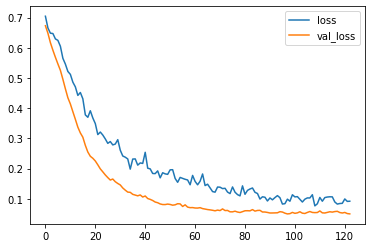

In [22]:
loss_df.plot()

In [27]:
predictions = model.predict_classes(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.99      0.99      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [30]:
print(confusion_matrix(y_test, predictions))

[[53  1]
 [ 1 88]]


You can see we came out with great results from this model with only 2 incorrectly diagnosed